<a href="https://colab.research.google.com/github/BharathKumar8202/Machine-Learning-Projects/blob/main/GenzDatingAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('GenZ_DatingApp_Data.csv')

In [3]:
df.head()

,User_ID,Age,Gender,Location,Education,Occupation,Primary_App,Secondary_Apps,Usage_Frequency,Daily_Usage_Time,Reason_for_Using,Satisfaction,Challenges,Desired_Features,Preferred_Communication,Partner_Priorities
0,1,20,Non-binary,Bangalore,Undergraduate,Freelancer,Hinge,Hinge,Monthly,1 hour,Finding a Partner,4,Safety Concerns,Audio Calls,Video Calls,Values > Personality > Appearance
1,2,24,Female,Delhi,Undergraduate,Part-time Job,Hinge,OkCupid,Weekly,30 minutes,Casual Dating,5,Time-Wasting,Video Calls,Text,Values > Personality > Appearance
2,3,24,Non-binary,Kolkata,Undergraduate,Intern,NaN,NaN,Weekly,2 hours,Casual Dating,4,Safety Concerns,Detailed Profiles,Text,Values > Personality > Appearance
3,4,22,Non-binary,Delhi,Graduate,Full-time Job,NaN,OkCupid,Daily,30 minutes,Casual Fun,3,NaN,AI Recommendations,Voice Notes,Personality > Interests > Values
4,5,18,Male,Delhi,Graduate,Intern,OkCupid,OkCupid,Weekly,2 hours,Casual Fun,4,Safety Concerns,Video Calls,Text,Appearance > Interests > Personality


In [4]:
df.describe(include=[np.number])

,User_ID,Age,Satisfaction
count,500.000000,500.000000,500.000000
mean,250.500000,21.582000,2.906000
std,144.481833,2.259532,1.441291
min,1.000000,18.000000,1.000000
25%,125.750000,20.000000,2.000000
50%,250.500000,22.000000,3.000000
75%,375.250000,24.000000,4.000000
max,500.000000,25.000000,5.000000


In [5]:
df.isnull().sum()

,0
User_ID,0
Age,0
Gender,0
Location,0
Education,0
Occupation,0
Primary_App,107
Secondary_Apps,114
Usage_Frequency,0
Daily_Usage_Time,0


In [6]:
duplicate_rows = df.duplicated()
print(duplicate_rows)

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool


In [7]:
def preprocessing(df):
    df.drop(['User_ID'], axis=1, inplace=True)
    df.rename(columns={'Location':'City','Primary_App': 'First_Choice',"Secondary_Apps": 'Second_Choice','Usage_Frequency': 'Usage','Daily_Usage_Time':'Daily_Use', 'Reason_for_Using': 'Reason'},inplace=True)
    df["First_Choice"].fillna("NoFirstChoice", inplace = True)
    df["Second_Choice"].fillna("NoSecondChoice", inplace = True)
    df["Challenges"].fillna("NoChallenges", inplace = True)
    return df

In [8]:
df=preprocessing(df)

In [9]:
df[["Gender", "Age"]].groupby("Gender").mean()

,Age
Gender,
Female,21.261364
Male,21.736842
Non-binary,21.777778


In [10]:
df.head()

,Age,Gender,City,Education,Occupation,First_Choice,Second_Choice,Usage,Daily_Use,Reason,Satisfaction,Challenges,Desired_Features,Preferred_Communication,Partner_Priorities
0,20,Non-binary,Bangalore,Undergraduate,Freelancer,Hinge,Hinge,Monthly,1 hour,Finding a Partner,4,Safety Concerns,Audio Calls,Video Calls,Values > Personality > Appearance
1,24,Female,Delhi,Undergraduate,Part-time Job,Hinge,OkCupid,Weekly,30 minutes,Casual Dating,5,Time-Wasting,Video Calls,Text,Values > Personality > Appearance
2,24,Non-binary,Kolkata,Undergraduate,Intern,NoFirstChoice,NoSecondChoice,Weekly,2 hours,Casual Dating,4,Safety Concerns,Detailed Profiles,Text,Values > Personality > Appearance
3,22,Non-binary,Delhi,Graduate,Full-time Job,NoFirstChoice,OkCupid,Daily,30 minutes,Casual Fun,3,NoChallenges,AI Recommendations,Voice Notes,Personality > Interests > Values
4,18,Male,Delhi,Graduate,Intern,OkCupid,OkCupid,Weekly,2 hours,Casual Fun,4,Safety Concerns,Video Calls,Text,Appearance > Interests > Personality


In [11]:
df.isnull().sum()

,0
Age,0
Gender,0
City,0
Education,0
Occupation,0
First_Choice,0
Second_Choice,0
Usage,0
Daily_Use,0
Reason,0


In [12]:
df.head()

,Age,Gender,City,Education,Occupation,First_Choice,Second_Choice,Usage,Daily_Use,Reason,Satisfaction,Challenges,Desired_Features,Preferred_Communication,Partner_Priorities
0,20,Non-binary,Bangalore,Undergraduate,Freelancer,Hinge,Hinge,Monthly,1 hour,Finding a Partner,4,Safety Concerns,Audio Calls,Video Calls,Values > Personality > Appearance
1,24,Female,Delhi,Undergraduate,Part-time Job,Hinge,OkCupid,Weekly,30 minutes,Casual Dating,5,Time-Wasting,Video Calls,Text,Values > Personality > Appearance
2,24,Non-binary,Kolkata,Undergraduate,Intern,NoFirstChoice,NoSecondChoice,Weekly,2 hours,Casual Dating,4,Safety Concerns,Detailed Profiles,Text,Values > Personality > Appearance
3,22,Non-binary,Delhi,Graduate,Full-time Job,NoFirstChoice,OkCupid,Daily,30 minutes,Casual Fun,3,NoChallenges,AI Recommendations,Voice Notes,Personality > Interests > Values
4,18,Male,Delhi,Graduate,Intern,OkCupid,OkCupid,Weekly,2 hours,Casual Fun,4,Safety Concerns,Video Calls,Text,Appearance > Interests > Personality


In [13]:
for col in df.select_dtypes(include=['object']).columns:
    counts = df[col].value_counts()
    print(f"Value counts for column '{col}':\n{counts}\n")


Value counts for column 'Gender':
Gender
Female        176
Male          171
Non-binary    153
Name: count, dtype: int64

Value counts for column 'City':
City
Mumbai       82
Delhi        76
Kolkata      76
Bangalore    69
Pune         67
Chennai      66
Hyderabad    64
Name: count, dtype: int64

Value counts for column 'Education':
Education
Graduate         169
Undergraduate    166
Postgraduate     165
Name: count, dtype: int64

Value counts for column 'Occupation':
Occupation
Student          106
Intern           105
Freelancer       103
Full-time Job    100
Part-time Job     86
Name: count, dtype: int64

Value counts for column 'First_Choice':
First_Choice
OkCupid          118
NoFirstChoice    107
Hinge            106
Bumble            93
Tinder            76
Name: count, dtype: int64

Value counts for column 'Second_Choice':
Second_Choice
NoSecondChoice    114
Hinge             103
OkCupid            96
Bumble             95
Tinder             92
Name: count, dtype: int64

Value c

In [14]:
app_usage_by_city = df.groupby(['City', 'First_Choice'])['First_Choice'].count().reset_index(name='Count')

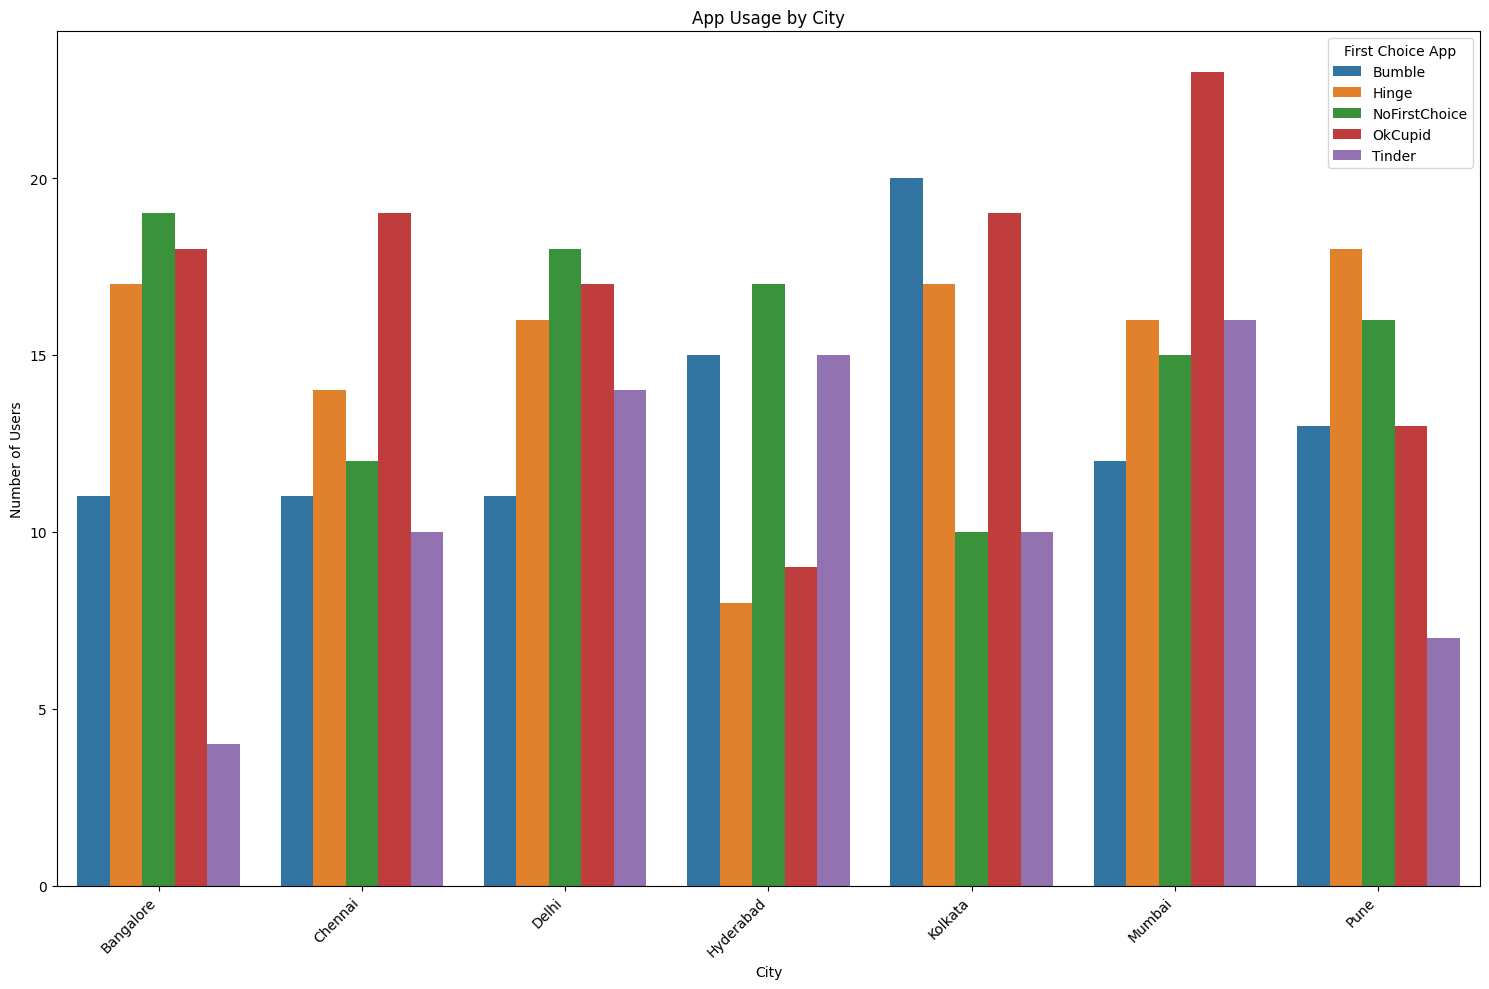

In [15]:
plt.figure(figsize=(15, 10))
sns.barplot(x='City', y='Count', hue='First_Choice', data=app_usage_by_city, ci=None)
plt.title('App Usage by City')
plt.xlabel('City')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.legend(title='First Choice App')
plt.tight_layout()
plt.show()

In [16]:
gender_across_city = df.groupby(['City', 'Gender'])['Gender'].count().reset_index(name='Count')

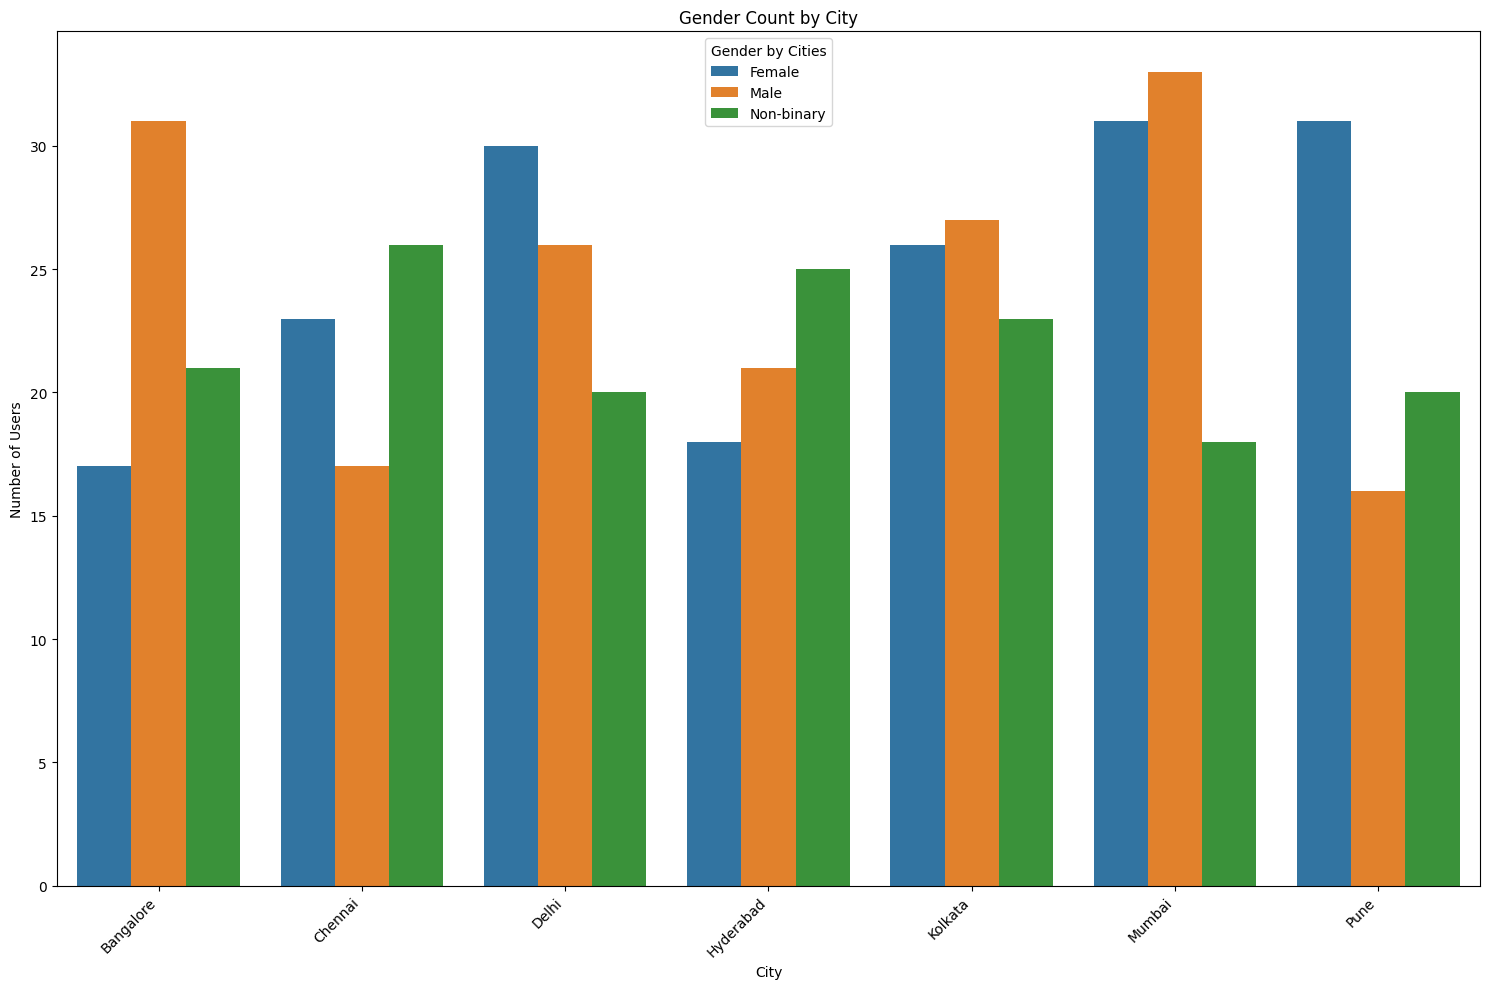

In [17]:
plt.figure(figsize=(15, 10))
sns.barplot(x='City', y='Count', hue='Gender', data=gender_across_city, ci=None)
plt.title('Gender Count by City')
plt.xlabel('City')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender by Cities')
plt.tight_layout()
plt.show()

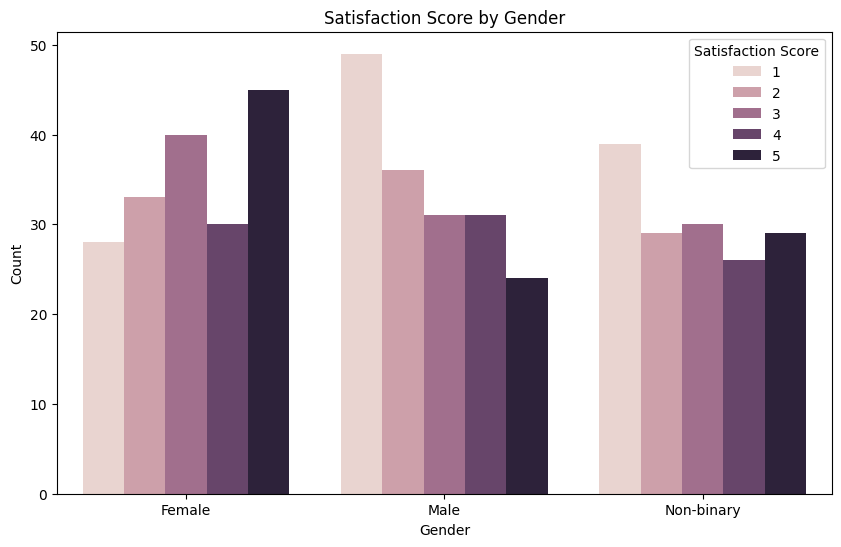

In [18]:
gender_satisfaction_counts = df.groupby(['Gender', 'Satisfaction'])['Satisfaction'].count().reset_index(name='Count')

# Create a bar plot to visualize the relationship
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x='Gender', y='Count', hue='Satisfaction', data=gender_satisfaction_counts)
plt.title('Satisfaction Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Satisfaction Score')
plt.show()

In [19]:
gender_challenges_counts = df.groupby(['Gender', 'Challenges'])['Challenges'].count().reset_index(name='Count')
print(gender_challenges_counts)

        Gender               Challenges  Count
0       Female  Lack of Genuine Matches     37
1       Female             NoChallenges     42
2       Female          Safety Concerns     40
3       Female             Time-Wasting     57
4         Male  Lack of Genuine Matches     46
5         Male             NoChallenges     40
6         Male          Safety Concerns     44
7         Male             Time-Wasting     41
8   Non-binary  Lack of Genuine Matches     52
9   Non-binary             NoChallenges     35
10  Non-binary          Safety Concerns     37
11  Non-binary             Time-Wasting     29
